In [ ]:
# code to run the notebook on Google Colab
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    COLAB = True
    print('Note: using Google CoLab')
    %tensorflow_version 2.x
except:
    print('Note: not using Google CoLab')
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


Used the Python Lung Segmentation module: lungs-segmentation 1.1.2
Link: https://pypi.org/project/lungs-segmentation/

In [ ]:
!pip install lungs-segmentation

     |████████████████████████████████| 28.2MB 1.5MB/s 
     |████████████████████████████████| 798kB 52.1MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 31.6MB/s 
     |████████████████████████████████| 13.1MB 12.4MB/s 
     |████████████████████████████████| 20.0MB 1.2MB/s 
     |████████████████████████████████| 952kB 46.2MB/s 
     |████████████████████████████████| 38.2MB 1.3MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: opencv-python 4.1.2.30
  

In [ ]:
# import the necessary packages
import cv2
from google.colab.patches import cv2_imshow # cv2.imshow does not work on Google Colab notebooks; use cv2_imshow instead
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import lungs_segmentation.inference as inference
import torch
import albumentations as A
from PIL import Image
from matplotlib import cm

In [ ]:
from lungs_segmentation.pre_trained_models import create_model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
model = create_model("resnet34")

Downloading: "https://github.com/alimbekovKZ/lungs_segmentation/releases/download/1.0.0/resnet34.pth" to /root/.cache/torch/hub/checkpoints/resnet34.pth


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

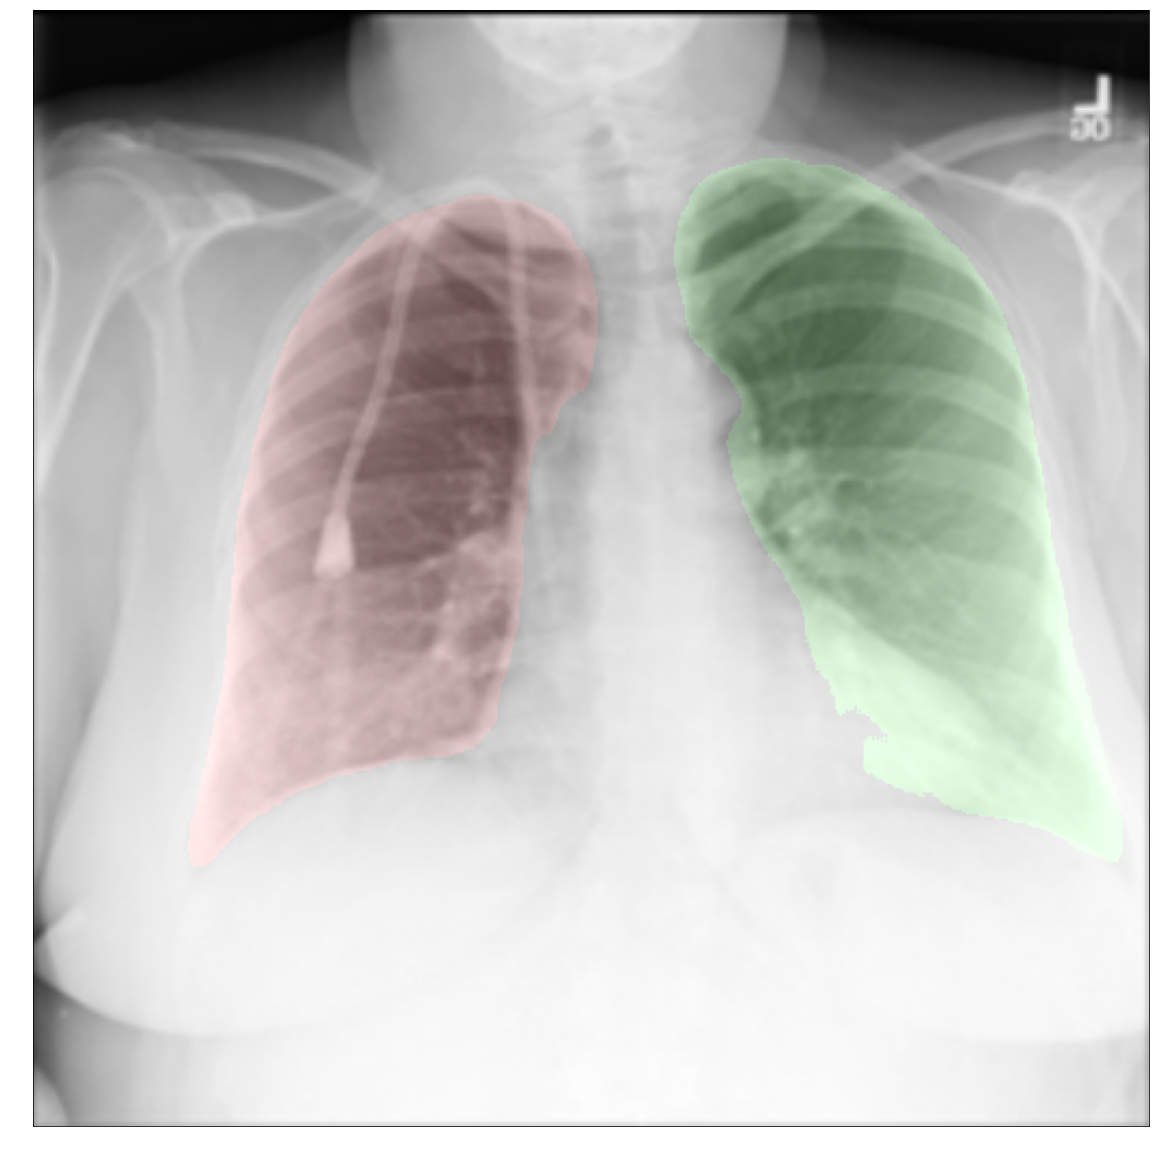

In [ ]:
plt.figure(figsize=(20,40))

plt.subplot(1,1,1)
#image, mask = inference.inference(model,'739px-Chest_Xray_PA_3-8-2010.png', 0.2)
image, mask = inference.inference(model,'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1598.png', 0.2)
plt.imshow(inference.img_with_masks(image, [mask[0], mask[1]], alpha = 0.1))

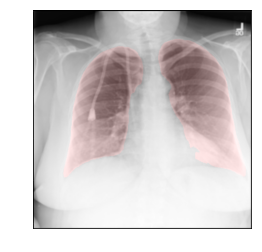

In [ ]:
# create one overall mask using the left and the right lung
plt.imshow(inference.img_with_masks(image, [mask[0]+mask[1]], alpha = 0.1))

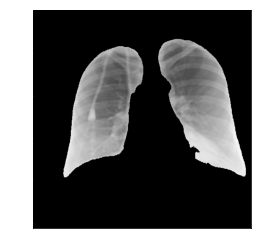

In [ ]:
# apply the mask to segment out the lungs
imagemasked = cv2.bitwise_and(image,image,mask = mask[0]+mask[1])
plt.imshow(imagemasked)

In [ ]:
# resize the image to match it to the model (separate notebook file)
resizedimagemasked = cv2.resize(imagemasked, (224,224))
resizedimagemasked.shape
#####################################################################

(224, 224, 3)

In [ ]:
!ls "drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman"

covid  noncovid


In [ ]:
# load unsegmented images
imagePaths = list(paths.list_images('drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid'))

[INFO] loading images...


In [ ]:
imagePaths

['drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1598.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1608.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1602.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1606.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1613.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1603.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1610.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1596.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1604.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1597.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-1605.png',
 'drive/My Drive/Colab Notebooks/Filtered_Dataset_Rahman/noncovid/Normal-161

In [ ]:
# loop over the image paths
for imagePath in imagePaths:
  # extract the filename
  filename = imagePath.split(os.path.sep)[-1]
  image, mask = inference.inference(model,imagePath, 0.2)
  # apply mask
  imagemasked = cv2.bitwise_and(image,image,mask = mask[0]+mask[1])
  resizedimagemasked = cv2.resize(imagemasked, (224,224))
  # save segmented images
  Image.fromarray((resizedimagemasked[:, :, :3] * 255).astype(np.uint8)).save(f'drive/My Drive/Colab Notebooks/Segmented_images/noncovid/{filename}')

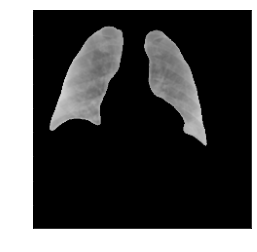

In [ ]:
plt.imshow(resizedimagemasked)
plt.savefig(r'drive/My Drive/Colab Notebooks/Segmented_images/covid/test.png')